In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10, activation='sigmoid')
      ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8170 - accuracy: 0.3543
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6255 - accuracy: 0.4247
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5450 - accuracy: 0.4547
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4850 - accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4352 - accuracy: 0.4946
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3930 - accuracy: 0.5087
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3542 - accuracy: 0.5236
Epoch 8/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3203 - accuracy: 0.5361
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2875 - accuracy: 0.5490
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - l

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.59      1000
           1       0.70      0.52      0.60      1000
           2       0.36      0.48      0.41      1000
           3       0.40      0.20      0.27      1000
           4       0.45      0.42      0.43      1000
           5       0.69      0.13      0.22      1000
           6       0.40      0.78      0.53      1000
           7       0.70      0.45      0.55      1000
           8       0.68      0.64      0.66      1000
           9       0.44      0.77      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.48     10000
weighted avg       0.54      0.50      0.48     10000



In [3]:
cnn = models.Sequential([
        #cnn layers
        #this layer can detect 32 different filter or 32 different edges in your images. Each filter have kernel size 3x3
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        #dense layers
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10, activation='softmax')
      ])

In [4]:
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [5]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.7280 - accuracy: 0.4384
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1975 - accuracy: 0.5812
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0556 - accuracy: 0.6354
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9339 - accuracy: 0.6755
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8460 - accuracy: 0.7074
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7593 - accuracy: 0.7372
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6633 - accuracy: 0.7710
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6004 - accuracy: 0.7927
Epoch 9/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.5259 - accuracy: 0.8190
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.75      0.84      0.79      1000
           2       0.58      0.58      0.58      1000
           3       0.54      0.45      0.49      1000
           4       0.58      0.69      0.63      1000
           5       0.65      0.48      0.55      1000
           6       0.72      0.80      0.76      1000
           7       0.84      0.64      0.73      1000
           8       0.76      0.76      0.76      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_test = y_test.reshape(-1,)

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [9]:
#prediction time
y_pred = cnn.predict(X_test)

prediksi =[np.argmax(kelas) for kelas in y_pred]

Prediction Result is:
horse


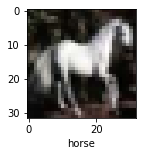

In [ ]:
#Prediksi benar
test_id = 13
plot_sample(X_test, y_test,test_id)
print("Prediction Result is:")
print(classes[prediksi[test_id]])
print("============================")

Prediction Result is:
automobile


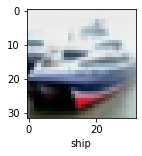

In [11]:
#Prediksi salah
test_id = 1
plot_sample(X_test, y_test,test_id)
print("Prediction Result is:")
print(classes[prediksi[test_id]])
print("============================")

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2